In [5]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import time
import csv
import glob
import itertools as it
import os
import re
import random
import math
import itertools as it
%matplotlib inline

In [6]:
def ColorGenerator(x):
    for i in range(0,x):
        r = lambda: random.randint(10,255) #so that colors aren't too light
        color = '#%02X%02X%02X' % (r(),r(),r())
#         print color
        colors.append(color)

{'215': '0', '159': '0', '144': '1', '164': '1', '111': '0', '173': '1', '232': '1', '230': '1', '141': '1', '183': '1', '508': '1', '504': '1', '502': '1', '201': '0', '203': '0', '142': '1', '143': '0', '206': '0', '108': '0', '128': '1', '167': '0', '161': '1', '513': '1', '517': '1'}
108 EO solid
111 EO solid
128 O dashed
143 EO solid
144 O dashed
159 EO solid
161 O dashed
164 O dashed
167 EO solid
173 O dashed
183 O dashed
201 EO solid
203 EO solid
206 EO solid
215 EO solid
230 O dashed
232 O dashed
502 O dashed
504 O dashed
508 O dashed
513 O dashed
517 O dashed
-------------------------------------------------------------------------------------
{1: [2.2000000000000002, 2.2000000000000002, 2.3999999999999999, 2.7000000000000002, 2.0, 2.6000000000000001, 2.2000000000000002, 2.3999999999999999, 2.0, 1.8999999999999999, 2.2000000000000002, 2.3999999999999999, 2.5], 2: [3.0, 3.2999999999999998, 2.5, 2.8999999999999999, 2.6000000000000001, 4.0, 3.0, 3.1000000000000001, 2.0, 2.2000000

<Container object of 3 artists>

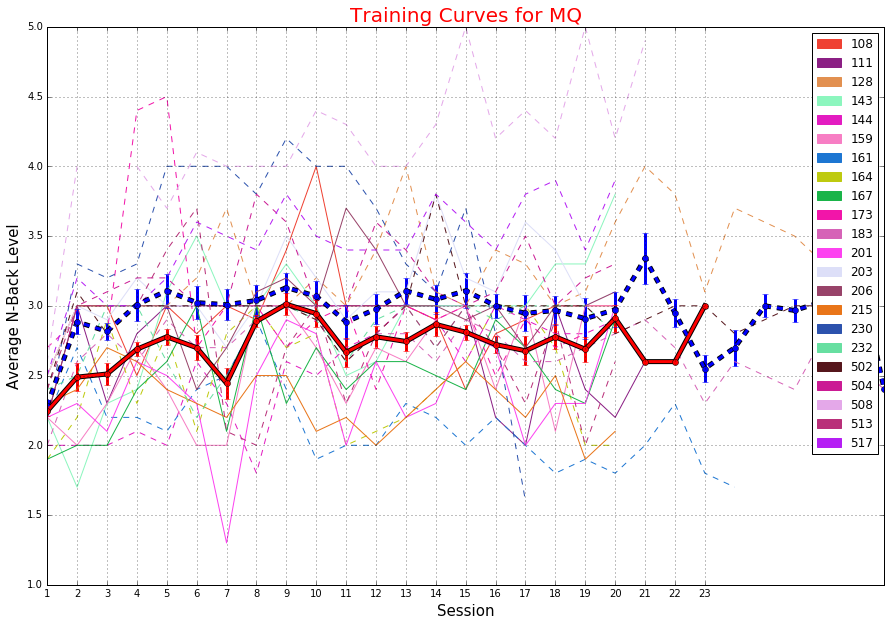

In [7]:
dataFiles = glob.glob('*_clean.csv')

plt.figure(figsize=(15,10))
plt.title('Training Curves for MQ', fontsize=20, color= 'red')
plt.xlabel('Session', fontsize=15)
plt.ylabel('Average N-Back Level',fontsize=15)
plt.grid(True)


colors = [] #need to think of more colors
ps = []
# ps.append(red_patch)
# ps.append(blue_patch)
condition = 'O'

reference = csv.DictReader(open('ref.csv', 'rb')) #this should be continuously update as we add participants {pid:condition}


patches = []
linecolor = ['r','g','b']
group = ''
df = {}
colnames = []
indic = []
ss = []
refdic = {} # {pid: condition}
averagelines = {}
levels = {}
Ostds =[]
EOstds = []
Tstds = []
Test = []

for r in reference: #get reference of conditions
    c = r['Condition'] #condition of participant
    p = r['SID'] #pid
    refdic[p]= refdic.get(p,c) #add to refdic so I have a dict of participant ids:condition
print refdic

for i,afile in enumerate(dataFiles):
    nbacklevel = [] #average levels...whoops
    sessions = [] #session...whoops
    data = csv.DictReader(open(afile, 'rb'))
    
    for row in data:
#         if row['S]'] == 'Session':
#             continue
        pid = row['PID']
        session = int(row['Session'])
        level = float(row['Avg Lvl'])
        levels[pid] = levels.get(pid, {})
        levels[pid][session] = levels[pid].get(session, [])
        levels[pid][session].append(level) #{1:[3,2,3,4,5]}
        if session not in colnames:
            colnames.append(session)
    participantCondition = int(refdic[pid])
    if participantCondition == 0:
        condition = 'EO'
        group = 'solid'
    elif participantCondition == 1:
        condition = 'O'
        group = 'dashed'
    elif participantCondition == 2:
        condition = 'T'
        group = 'dotted'
    else:
        print "hello"
        condition = 'uh'
        group = 'solid'
            
    for level in levels[pid]:
        s=1
        sessions.append(level)

    for thing in sessions:

        nbacklevel.append(np.mean(levels[pid][thing]))

    print pid, condition, group
    indic.append(pid)
    ColorGenerator(len(indic))
    df[pid] = df.get(pid, [])
    df[pid].append(nbacklevel)
    plt.plot(sessions,nbacklevel, color = colors[i], linestyle = group, linewidth = 1) #get lines
    patch = mpatches.Patch(color= colors[i], label=pid) #add to legend
    ps.append(patch) #add to collection of patches for legend
plt.legend(handles=ps) #show legend



plt.xticks(np.arange(1 ,max(sessions)+4, 1))


OAv = []
TAv = []
EOAv = []

# print "REFF DIC"
print "-------------------------------------------------------------------------------------"
# print refdic

OList = {}
EOList = {}
TList = {}

for subject in df:
    
    if refdic[subject] == '0':
        k = 0
        for item in df[subject][0]:
            EOList[k+1]=EOList.get(k+1,[])
            EOList[k+1].append(item)
            k += 1
            
    elif refdic[subject] =='1':
        k = 0
        for item in df[subject][0]:
            OList[k+1]=OList.get(k+1,[])
            OList[k+1].append(item)
            k += 1
    elif refdic[subject] =='2':
        k = 0
        for item in df[subject][0]:
            TList[k+1]=TList.get(k+1,[])
            TList[k+1].append(item)
            k += 1


print OList
print EOList
print TList


Oaverages = []
for item in OList:
    mean = np.nanmean(OList[item])
    std = np.nanstd(OList[item])
    sem = std/math.sqrt(len(OList)+1)
    Oaverages.append(mean)
    Ostds.append(sem)


Taverages =[]
for item in TList:
    mean = np.nanmean(TList[item])
    std = np.nanstd(TList[item])
    Taverages.append(mean)
    Tstds.append(std)

EOaverages =[]
for item in EOList:
    mean = np.nanmean(EOList[item])
    std = np.nanstd(EOList[item])
    sem = std/math.sqrt(len(EOList)+1)
    EOaverages.append(mean)
    EOstds.append(sem)


o = list(i for i in range(1,len(Oaverages)+1))
t = list(i for i in range(1,len(Taverages)+1))
eo = list(i for i in range(1,len(EOaverages)+1))

plt.plot( o, Oaverages, color = 'k', linestyle = 'dashed', linewidth = 5)
plt.plot( t, Taverages, color = 'k', linestyle = 'dotted', linewidth = 5)
plt.plot( eo, EOaverages, color = 'k', linestyle = 'solid', linewidth = 5)
plt.errorbar(o, Oaverages, yerr=Ostds, fmt='-o', linewidth = 3,linestyle = 'dashed')
plt.errorbar( t, Taverages, yerr=Tstds, fmt='-o', linewidth = 3)
plt.errorbar( eo, EOaverages, yerr=EOstds, fmt='-o', linewidth = 3, linestyle = 'solid')

In [8]:
if os.path.exists('data.csv'):
            writer = csv.writer(open('data.csv', 'ab'))  # open filewriter
else:
    writer = csv.writer(open('data.csv', 'wb'))
    writer.writerow(
        ['Condition'])  # write headers

writer.writerow(["Once"] + Oaverages)
writer.writerow(["sem"] + Ostds)
writer.writerow(["More than Once"] + EOaverages)
writer.writerow(["sem"] + EOstds)
